## Clustering exploration
Exploring some clustering algorithms on the NYC bike data for Jun - Aug 2018.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplleaflet
import pandas as pd
import numpy as np
import json
import math

from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

from matplotlib import cm

In [3]:
subs_df = pd.read_pickle('./data/pickledDFs/subs_df-NYC_Summer_2018.pkl')
stations_info_df = pd.read_pickle('./data/pickledDFs/stations_info_df-NYC_Summer_2018.pkl')
subs_trips_df = pd.read_pickle('./data/pickledDFs/subs_trips_df-NYC_Summer_2018.pkl')

weekday_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] != 'Weekend']
weekend_subs_trips_df = subs_trips_df[subs_trips_df['Trip_Type'] == 'Weekend']

In [4]:
subs_trips_df.head()

,tripduration,starttime,stoptime,start station id,end station id,bikeid,usertype,birth year,gender,start_day,stop_day,pickup_hour,dropoff_hour,age,Trip_Type,start_end_station
0,569,2018-06-01 01:57:20.514,2018-06-01 02:06:50.088,72,173,21481,Subscriber,1999,1,4,4,1,2,19,Late Night,"(72, 173)"
1,480,2018-06-01 02:02:42.398,2018-06-01 02:10:43.354,72,477,19123,Subscriber,1988,1,4,4,2,2,30,Late Night,"(72, 477)"
2,692,2018-06-01 02:04:23.624,2018-06-01 02:15:55.747,72,457,26983,Subscriber,1986,1,4,4,2,2,32,Late Night,"(72, 457)"
3,664,2018-06-01 03:00:55.461,2018-06-01 03:11:59.906,72,379,26742,Subscriber,1973,1,4,4,3,3,45,Late Night,"(72, 379)"
4,818,2018-06-01 06:04:54.427,2018-06-01 06:18:32.617,72,459,26386,Subscriber,1984,1,4,4,6,6,34,Commuter,"(72, 459)"


In [5]:
#Q: what are the best features to consider? Here I am taking the mode of each feature for every station, 
#but maybe other measures are more appropriate for other features

X_df = weekday_subs_trips_df.groupby('start station id').apply(pd.DataFrame.mode)
X_df[['start_day','pickup_hour','age']].dropna().head()

,,start_day,pickup_hour,age
start station id,,,,
72,0,0.0,8.0,30.0
79,0,4.0,18.0,31.0
82,0,0.0,18.0,34.0
83,0,3.0,18.0,32.0
119,0,2.0,19.0,37.0


In [7]:
X_df = X_df[['tripduration','start_day','pickup_hour','age','start station id']].dropna()

In [5]:
#Imported from UMICH coursera course, a simple scatter plot function

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.show()

<IPython.core.display.Javascript object>


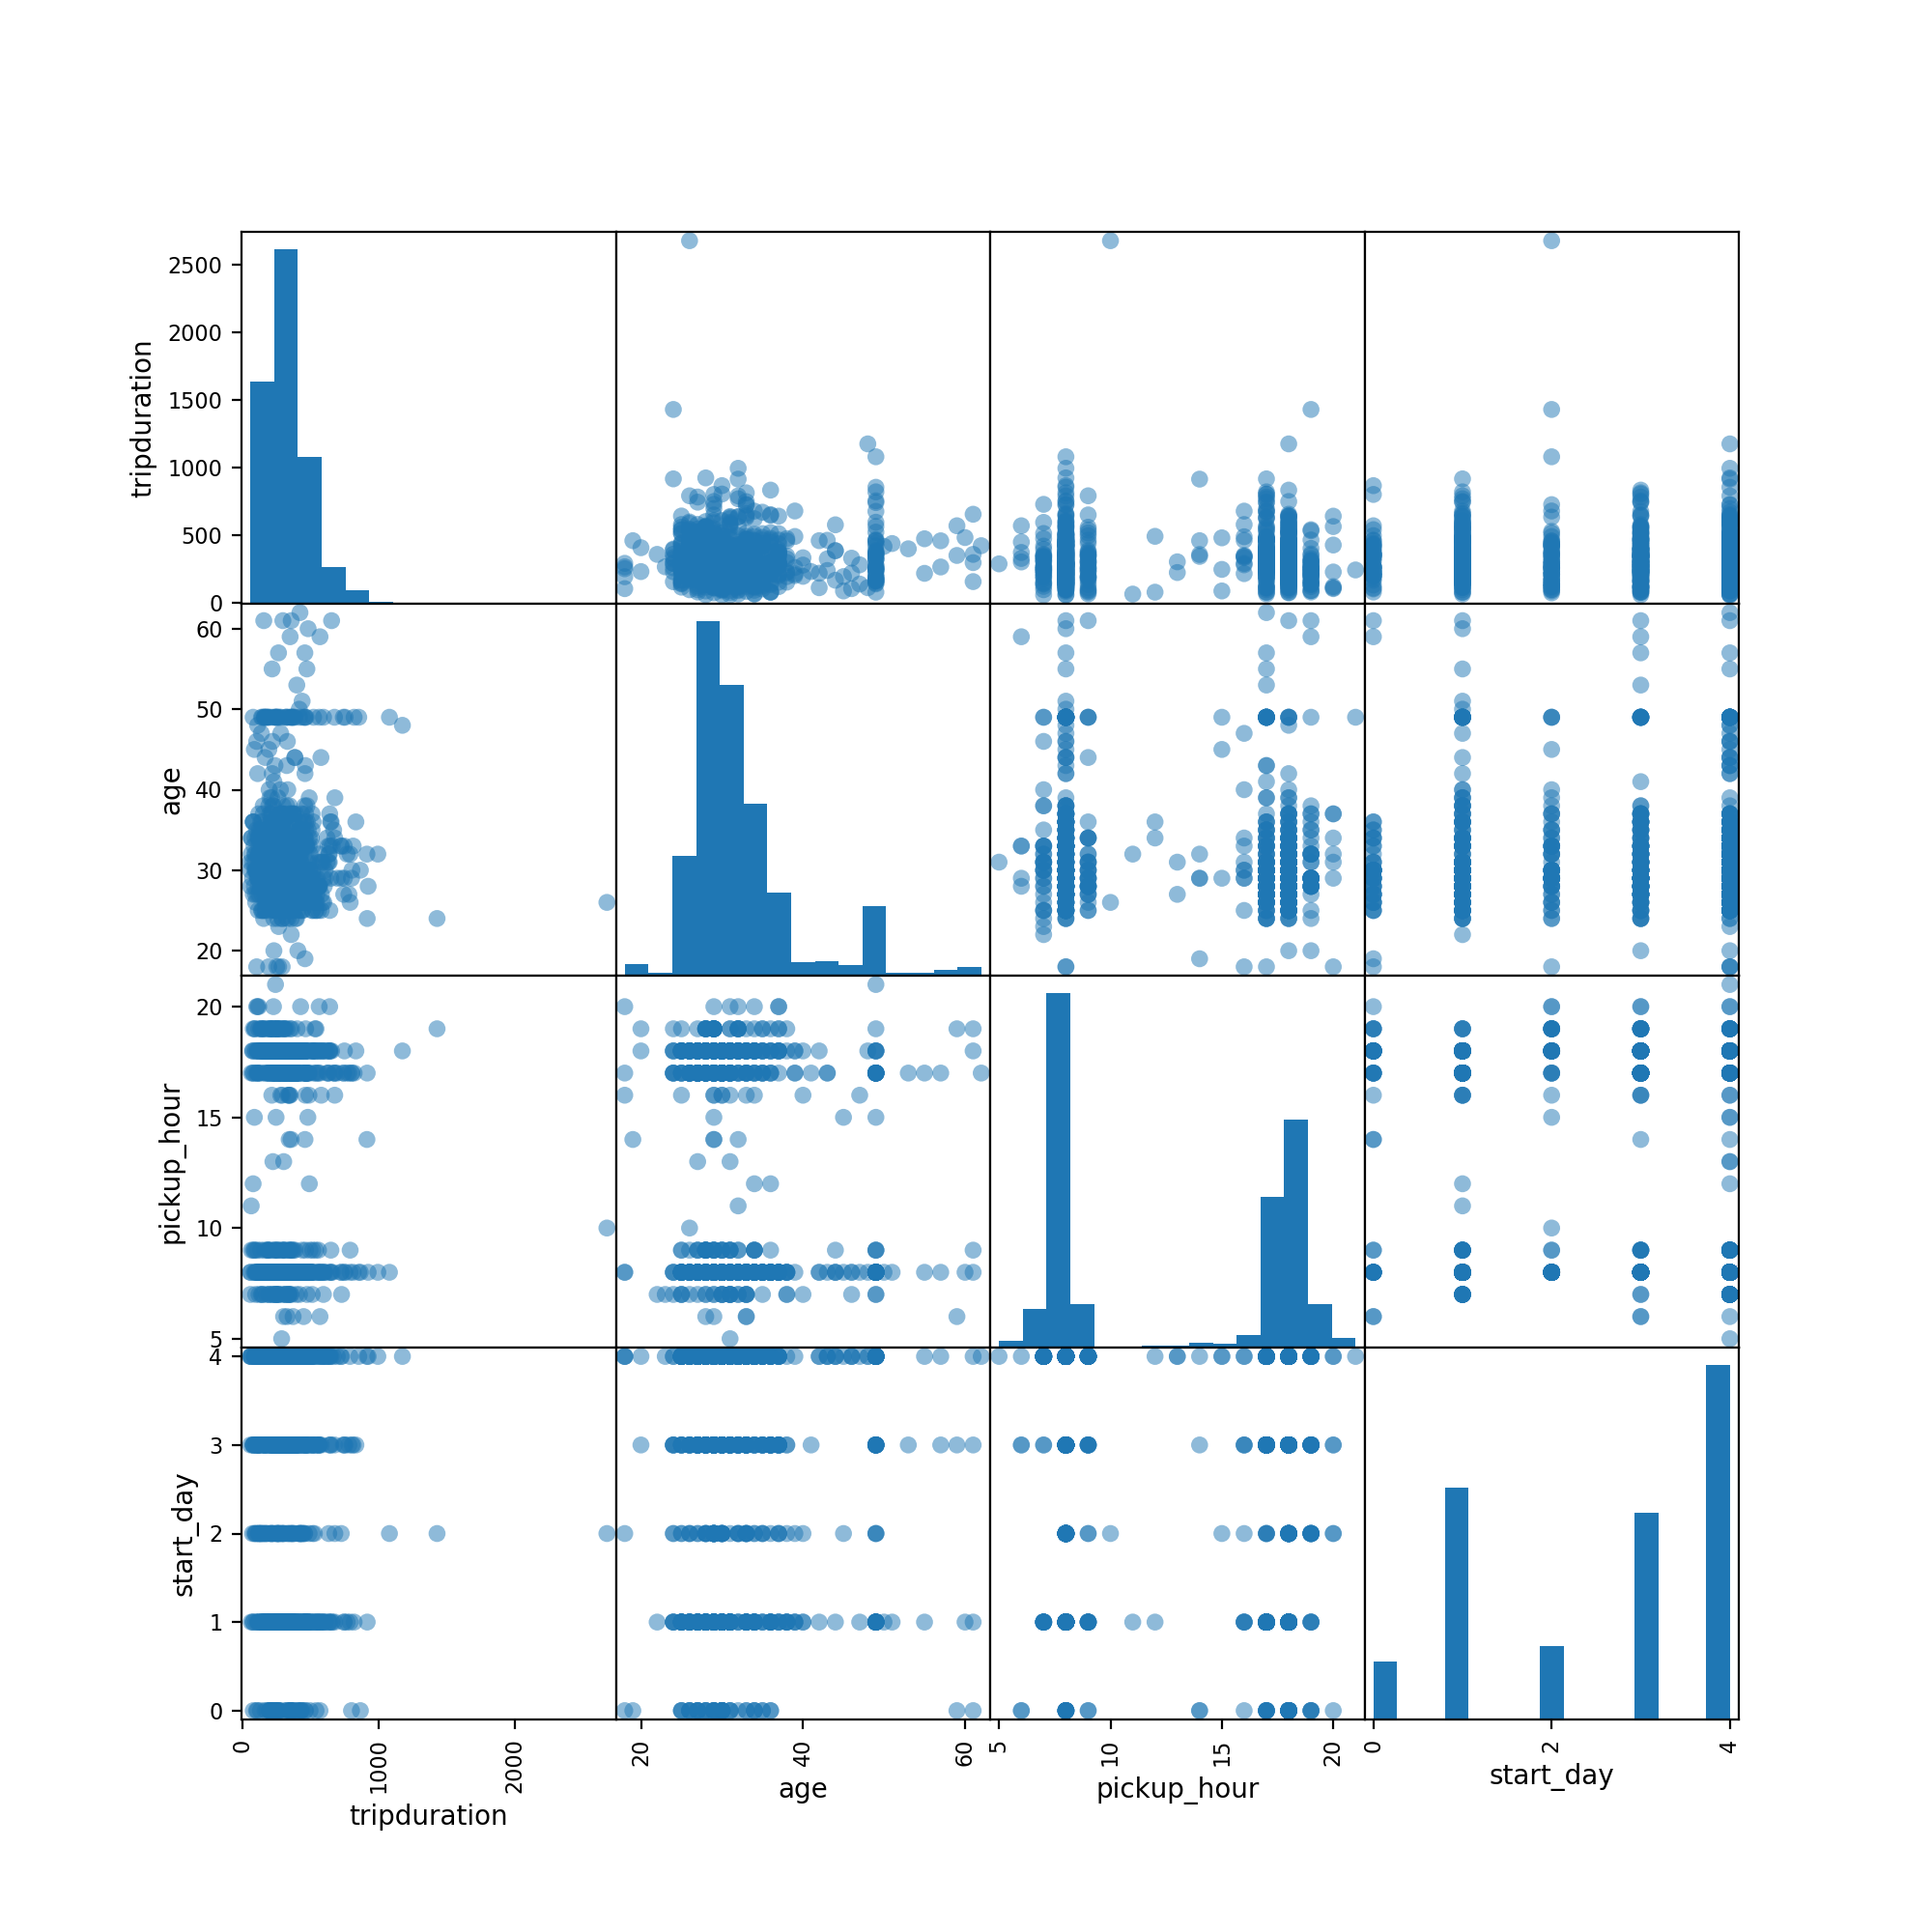

In [8]:
X = X_df[['tripduration','age','pickup_hour','start_day']]

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


C:\Users\pgsze\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


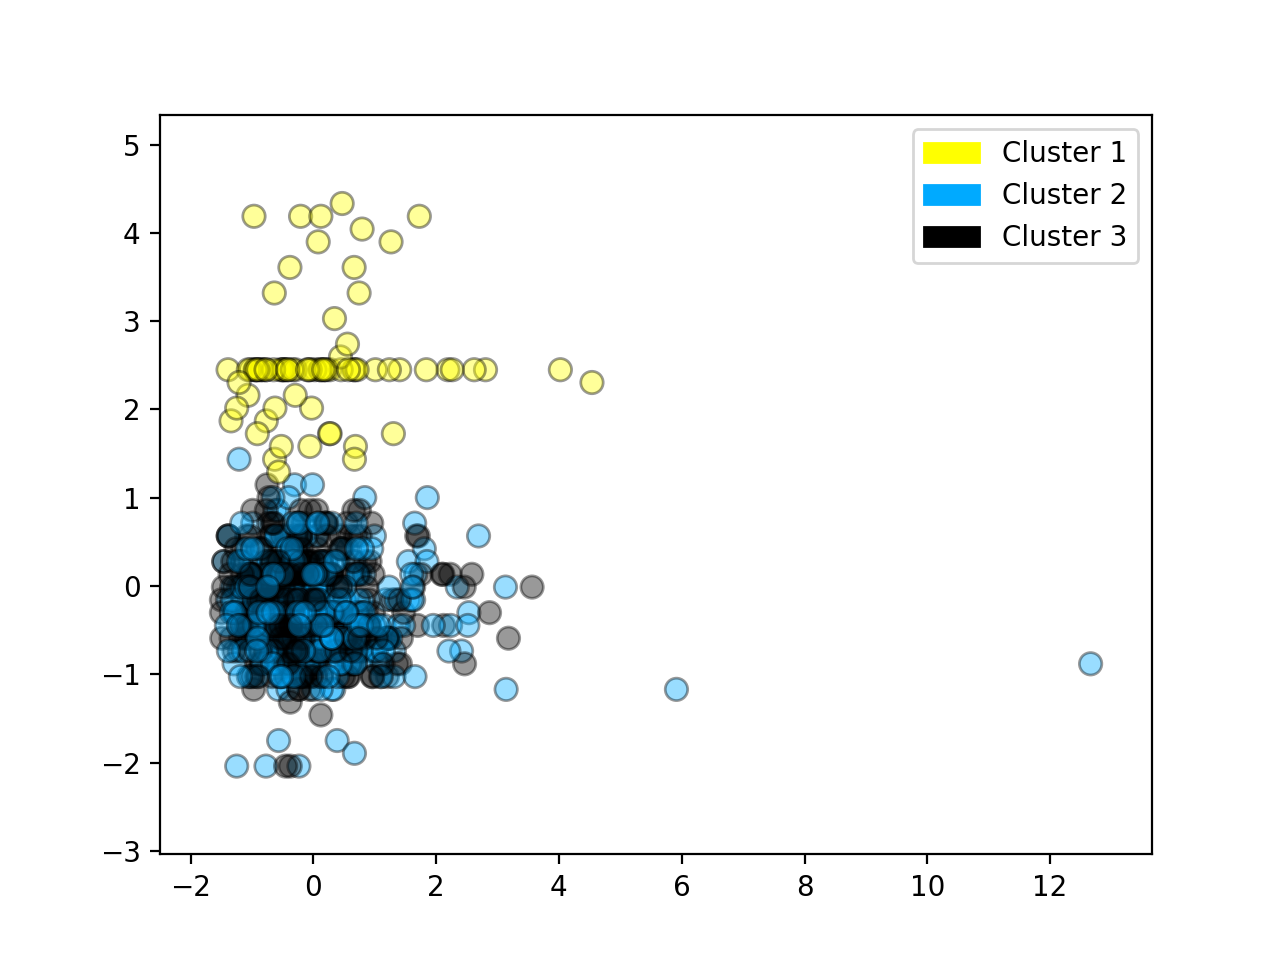

In [43]:

X = X_df[['tripduration','age','pickup_hour','start_day']].as_matrix()
#y_fruits = fruits[['fruit_label']] - 1

X_normalized = StandardScaler().fit(X).transform(X)  

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [35]:
subs_trips_df[['tripduration','start_day','pickup_hour', 'age']].astype(float).head()
#subs_trips_df['start_day'].head()
#subs_trips_df['pickup_hour'].head()

#subs_trips_df['age'].head()

,tripduration,start_day,pickup_hour,age
0,569.0,4.0,1.0,19.0
1,480.0,4.0,2.0,30.0
2,692.0,4.0,2.0,32.0
3,664.0,4.0,3.0,45.0
4,818.0,4.0,6.0,34.0


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = X_df[['tripduration','age','pickup_hour']].as_matrix()
#y_fruits = fruits[['fruit_label']] - 1

X_normalized = StandardScaler().fit(X).transform(X)

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

print(X.shape, X_pca.shape)

(785, 3) (785, 2)


C:\Users\pgsze\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [51]:
pca.explained_variance_ratio_

array([0.36640682, 0.33761625])

<IPython.core.display.Javascript object>


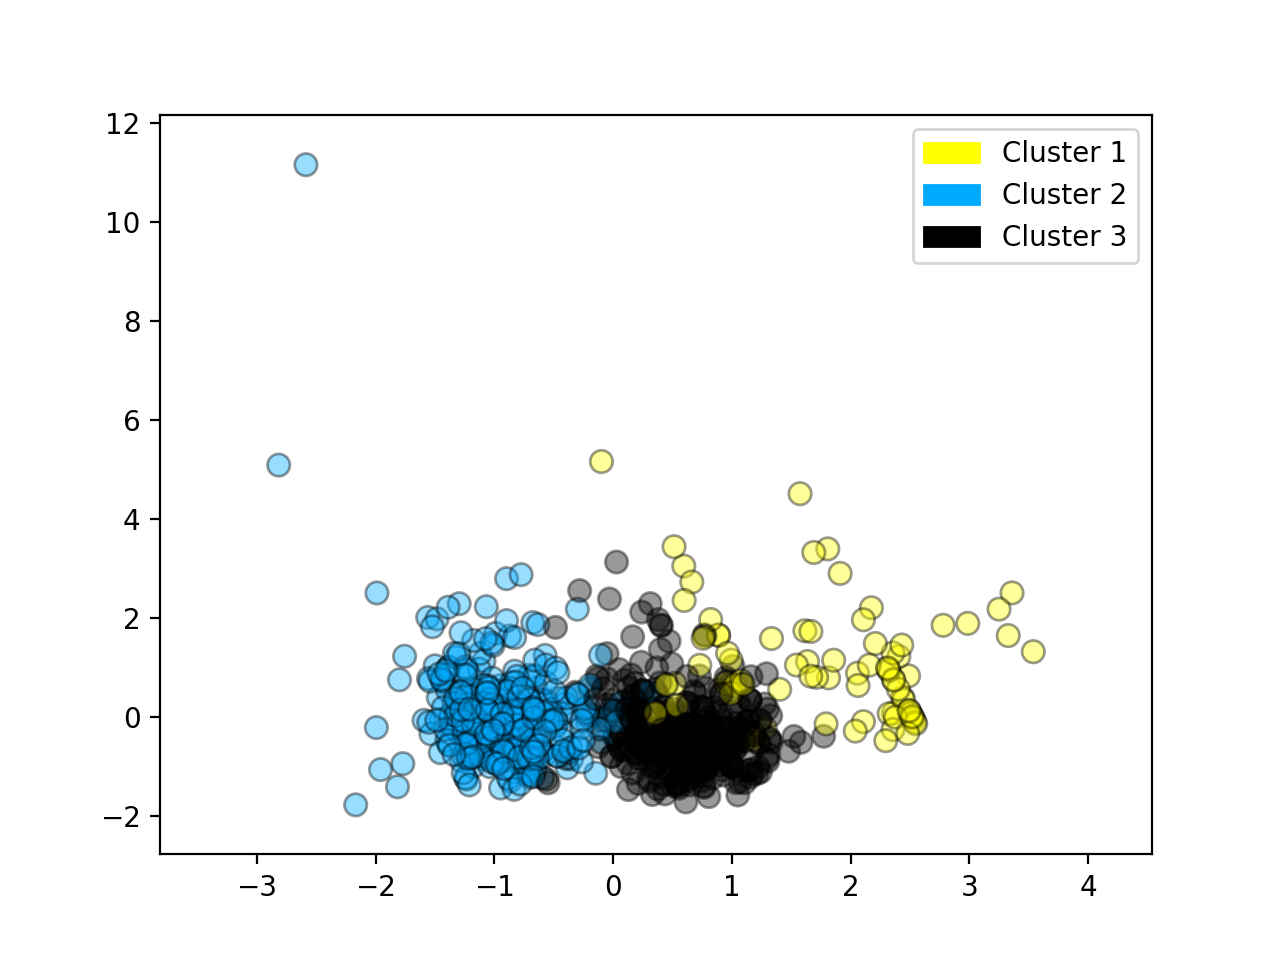

In [57]:
plot_labelled_scatter(X_pca, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3'])


In [58]:
X_pca

array([[ 0.35277633,  0.56304056],
       [-0.78709378, -0.29820054],
       [-0.48625924, -0.18843107],
       ...,
       [-0.97680718, -0.93770982],
       [-0.92201893, -1.03254665],
       [-1.40649946,  0.94437998]])

In [61]:
pca.mean_

array([1.08617998e-16, 7.24119985e-17, 4.52574991e-17])

<IPython.core.display.Javascript object>


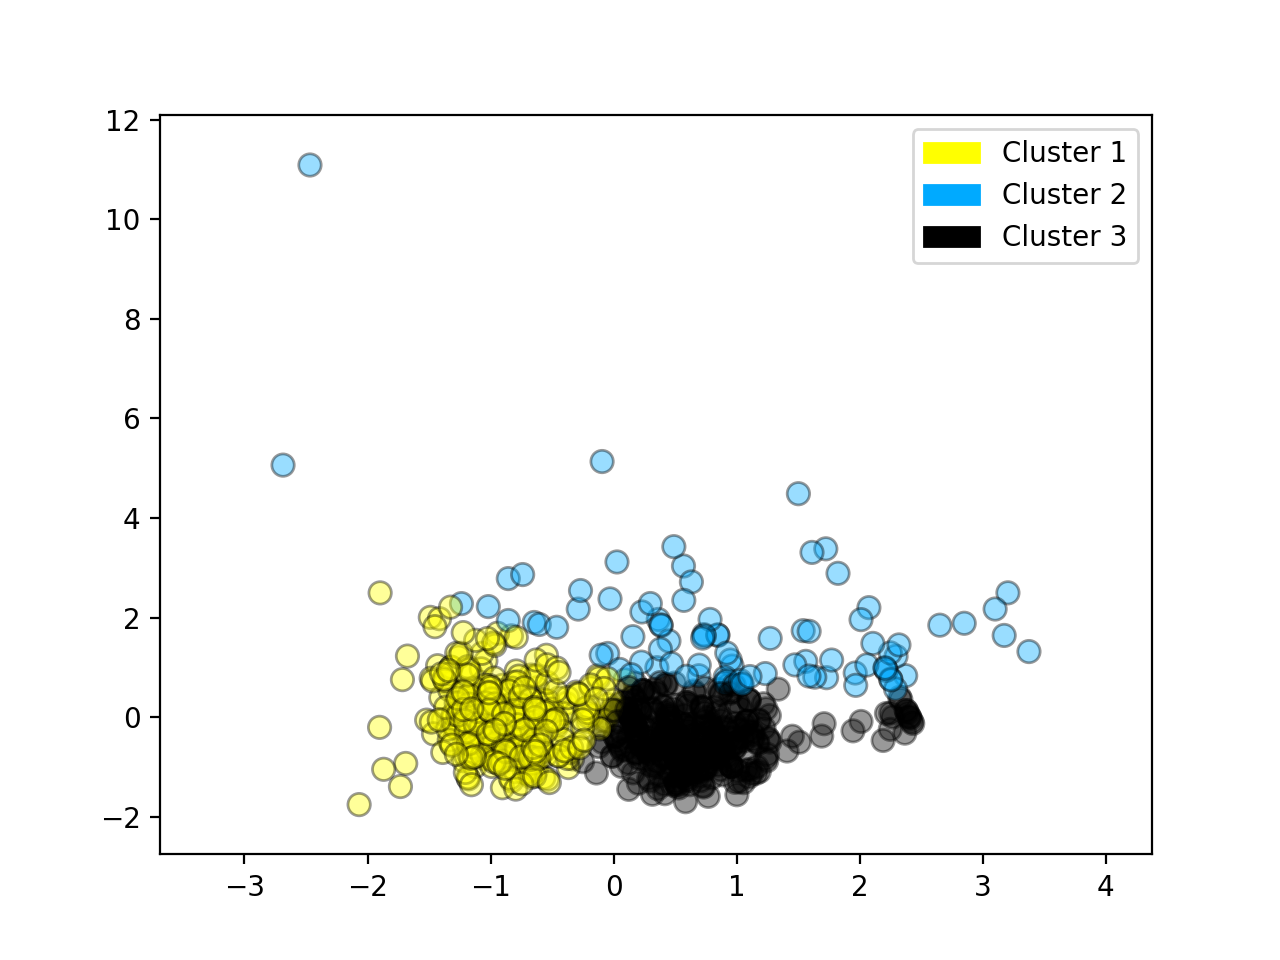

In [64]:

X = X_pca
#y_fruits = fruits[['fruit_label']] - 1

X_normalized = StandardScaler().fit(X).transform(X)  

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3'])
plot_labelled_scatter?

<IPython.core.display.Javascript object>


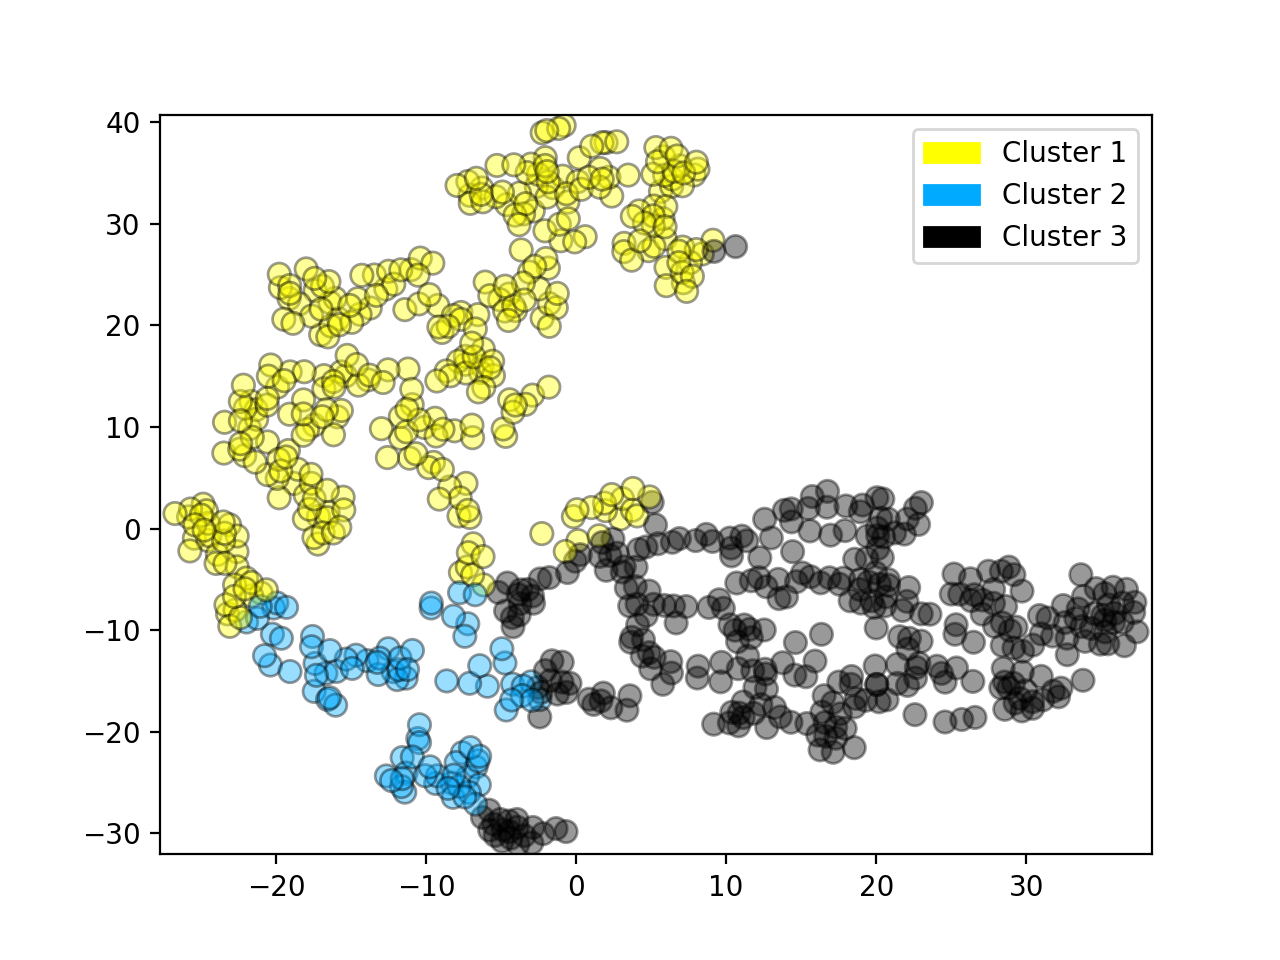

In [65]:
from sklearn.manifold import TSNE

tsne = TSNE()

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3'])